#**Proyecto: Modelado de datos**


###**Nombre:Jordan Hernández Daza
###**Código:1006287264 

In [ ]:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import math 
import datetime

In [ ]:
data= pd.read_csv("dataset.csv")

In [ ]:
data.head(5)

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration
0,SHP263573,2019-03-14 11:57:42,Rotterdam,Kuala Lumpur,NL,MY,93.8600,665.0,0.9,Ocean,Neele-Vat Logistics,29.34514
1,SHP90587,2019-06-13 09:32:47,Rotterdam,Kuala Lumpur,NL,MY,87.2343,180.0,0.9,Ocean,Neele-Vat Logistics,18.33877
2,SHP607571,2019-03-07 11:39:49,Rotterdam,Kuala Lumpur,NL,MY,92.4500,97.0,0.9,Ocean,Neele-Vat Logistics,9.22095
3,SHP291606,2020-02-05 23:00:32,Rotterdam,Kuala Lumpur,NL,MY,92.9000,1000.0,0.9,Ocean,Neele-Vat Logistics,13.94815
4,SHP774605,2020-01-04 17:02:40,Rotterdam,Kuala Lumpur,NL,MY,91.9500,1406.0,0.9,Ocean,Neele-Vat Logistics,11.46296


In [ ]:
data.dtypes

shp_code           object
departure          object
city_from          object
city_to            object
country_from       object
country_to         object
cost_per_kg       float64
gross_weight      float64
carrier_charge    float64
mode               object
carrier            object
duration          float64
dtype: object

###2.1

In [ ]:
#Se cambia el formato de la columna "departure" para operar
data["departure"] = pd.to_datetime(data["departure"])#, infer_datetime_format=True  )#format='%Y%m%d%H:%M:%S' )

In [ ]:
from datetime import timedelta
#data["departure"][0] +  timedelta(days=4.1)
#data=data.assign(arrival=lambda x: x["departure"] +x["duration"].map(timedelta))

In [ ]:
data["arrival"]=data["departure"] + data["duration"].map(timedelta) #se suma el número de días que tarda el shipment

In [ ]:
data.dtypes

shp_code                  object
departure         datetime64[ns]
city_from                 object
city_to                   object
country_from              object
country_to                object
cost_per_kg              float64
gross_weight             float64
carrier_charge           float64
mode                      object
carrier                   object
duration                 float64
arrival           datetime64[ns]
dtype: object

In [ ]:
data["customer_price"]= data["cost_per_kg"]*data["duration"] # price customer depends on duration of Shipping time()

In [ ]:
data.sample(5)

,shp_code,departure,city_from,city_to,country_from,country_to,cost_per_kg,gross_weight,carrier_charge,mode,carrier,duration,arrival,customer_price
5019,SHP338606,2020-02-11 11:19:43,Rotterdam,Kuala Lumpur,NL,MY,93.970000,270.5,0.75,Air,NTG Air & Ocean,5.04884,2020-02-16 12:30:02.776,474.439495
118,SHP660603,2019-09-29 11:56:15,Rotterdam,Kuala Lumpur,NL,MY,88.750000,150.0,0.75,Air,NTG Air & Ocean,5.23854,2019-10-04 17:39:44.856,464.920425
1683,SHP990604,2019-11-29 17:16:23,Rotterdam,Kuala Lumpur,NL,MY,92.797754,330.0,0.75,Air,NTG Air & Ocean,5.01921,2019-12-04 17:44:02.744,465.771415
3008,SHP80578,2019-04-15 12:46:51,Rotterdam,Kuala Lumpur,NL,MY,89.850000,5000.0,0.90,Ocean,Neele-Vat Logistics,29.68646,2019-05-15 05:15:21.144,2667.328431
4665,SHP713604,2019-11-16 08:20:42,Rotterdam,Kuala Lumpur,NL,MY,90.956200,1006.0,0.90,Ocean,Neele-Vat Logistics,7.83819,2019-11-24 04:27:41.616,712.931977


### 2.2


*  En la primera distribución se puede apreciar que los datos se acumulan entre 5 y 5.4 y presenta simetría respecto a su valor medio.Tal como se puede evidenciar con los valores de "skweness" y "kurtosis". 
*  En la distribución para "gross_weight" se presenta poca simetría y por lo tanto el valor de la "skweness" es alta y además los datos se distribuyen en la cola, tal como lo evidencia el valor de "kurtosis"
* La ditribución final presenta 2 picos entre 85 y 95. Es simétrica de acuerdo al de "skweness" y se acumulan pocos valores en las colas ya que el valor de "kurtosis" es negativo. 

Skew: -0.013458581743356438
Kurtosis: -1.236268865752557


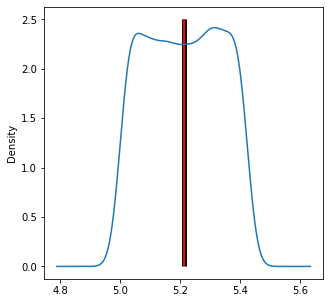

In [ ]:
#Se define data1 con el fin de tener el dataset con las condiciones requeridas
data1= data[(data["carrier"]=="NTG Air & Ocean") & (data["country_to"]=="MY")]

data1["duration"].plot(kind="density", figsize=(5,5));


plt.vlines(data1["duration"].mean(),     # media = línea negra
           ymin=0, 
           ymax=2.5,
           linewidth=5.0);

plt.vlines(data1["duration"].median(),   # mediana = línea roja
           ymin=0, 
           ymax=2.5, 
           linewidth=2.0,
           color="red");
print("Skew:",data1["duration"].skew())           
print("Kurtosis:",data1["duration"].kurt()) 

Skew: 1.1561025910249785
Kurtosis: 0.6338053776831489


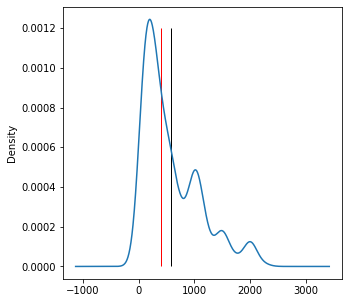

In [ ]:
#data[(data["carrier"]=="NTG Air & Ocean") & (data["country_to"]=="MY")].groupby(["carrier","country_to"])["gross_weight"].plot.kde()
data1["gross_weight"].plot(kind="density", figsize=(5,5));


plt.vlines(data1["gross_weight"].mean(),     # media = línea negra
           ymin=0, 
           ymax=0.0012,
           linewidth=1.0);

plt.vlines(data1["gross_weight"].median(),   # mediana = línea roja
           ymin=0, 
           ymax=0.0012, 
           linewidth=1.0,
           color="red");
print("Skew:",data1["gross_weight"].skew())           
print("Kurtosis:",data1["gross_weight"].kurt()) 

Skew: -0.3050532365952068
Kurtosis: -0.9711987460982057


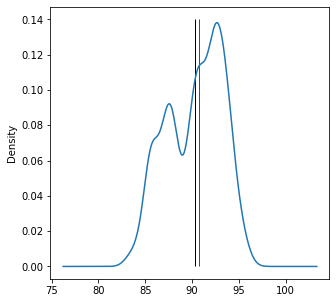

In [ ]:
#data[(data["carrier"]=="NTG Air & Ocean") & (data["country_to"]=="MY")].groupby(["carrier","country_to"])["cost_per_kg"].plot.kde()
data1["cost_per_kg"].plot(kind="density", figsize=(5,5));


plt.vlines(data1["cost_per_kg"].mean(),     # media = línea negra
           ymin=0, 
           ymax=0.14,
           linewidth=1.0);

plt.vlines(data1["cost_per_kg"].median(),   # mediana = línea roja
           ymin=0, 
           ymax=0.14, 
           linewidth=1.0,
           color="red");
print("Skew:",data1["cost_per_kg"].skew())           
print("Kurtosis:",data1["cost_per_kg"].kurt()) 

En el promedio de los meses y los días se observa la misma tendencia, sin embargo cuando se tiene el promedio del costo por kg en días se observa mayor cambio de estos valores que se "suavizan" cuando se toma el promedio del costo mensualmente   

In [ ]:
import datetime as dt
import seaborn as sns
data1= data[(data["carrier"]=="NTG Air & Ocean") & (data["country_to"]=="MY")]

data_month1=data.groupby(pd.Grouper(key='departure',freq='M'))


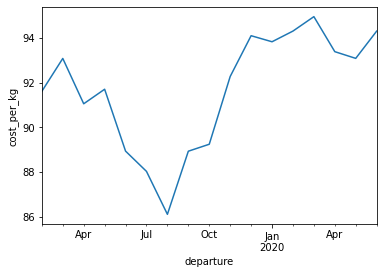

In [ ]:
data_month1["cost_per_kg"].mean().plot()
plt.ylabel("cost_per_kg")

plt.show()

In [ ]:
# Dos formas de tomar los días  
data_day= data1.groupby([data1.departure.dt.year.rename('year'),data1.departure.dt.month.rename('month'),data1.departure.dt.day.rename('day')])


data_day1=data1.groupby(data1.departure.dt.to_period("d") )


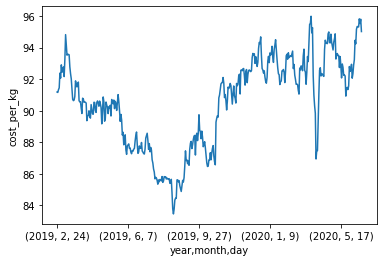

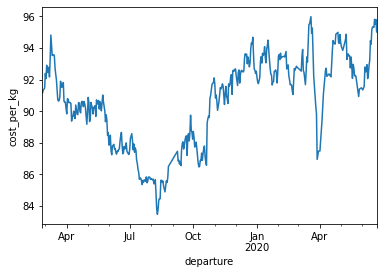

In [ ]:
# comparando diferentes métodos para el promedio de cost_per_kg diario 
data_day["cost_per_kg"].mean().plot()
plt.ylabel("cost_per_kg")
plt.show()

data_day1["cost_per_kg"].mean().plot()
plt.ylabel("cost_per_kg")
plt.show()

En este caso se puede observar que estos valores no tienden a crecer o decrecer con el tiempo. Para los meses de noviembre y enero se alcanzan valores maxímos para el peso bruto. Para el número de envíos hechos cada 2 horas se obtienen valores parecidos durante todo el periodo de tiempo tomado.

In [ ]:
# Se define un nuevo dataset para tomar los valores de septiembre en adelante

data_sep= data[(data["carrier"]=="NTG Air & Ocean") & (data["country_to"]=="MY")& (data.departure.dt.date.values>datetime.date(2019, 9, 1)) ]

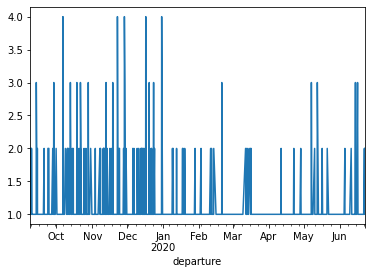

In [ ]:
# se contabliliza el número de codigos shp para determinar el número de envíos hechos cada 2 horas
data_hour_sep= data_sep.groupby([data_sep.departure.dt.to_period("2h")] )
data_hour_sep["shp_code"].sum().apply(lambda x: x.count("SHP")).plot()

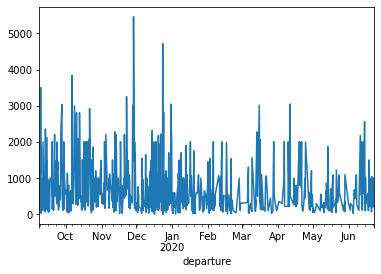

In [ ]:
data_hour_sep["gross_weight"].sum().plot()


###2.3

In [ ]:
import tensorflow as tf


In [ ]:
df=pd.DataFrame(data_day1["cost_per_kg"].mean() )
df.shape # número de datos 

(430, 1)

In [ ]:
from sklearn.preprocessing import  MinMaxScaler

look_back=2
# split into train and test sets
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]

# Escalamiento de datos entre 0 y 1 
scaler = MinMaxScaler(feature_range=(0, 1))
trainN = scaler.fit_transform(train)
testN = scaler.transform(test)


In [ ]:

# se utiliza la función split_sequence con el fin de tomar 2 valores para predecir el siguiente (one-step model) 
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		end_ix = i + n_steps
		if end_ix > len(sequence)-1:
			break
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

X_train, y_train = split_sequence(trainN, look_back)
X_test, y_test = split_sequence(testN, look_back)


In [ ]:
X_train

array([[[0.67983497],
        [0.67748809]],

       [[0.67748809],
        [0.69288948]],

       [[0.69288948],
        [0.70314592]],

       [[0.70314592],
        [0.78544787]],

       [[0.78544787],
        [0.75753901]],

       [[0.75753901],
        [0.83135525]],

       [[0.83135525],
        [0.79057825]],

       [[0.79057825],
        [0.79483527]],

       [[0.79483527],
        [0.81991422]],

       [[0.81991422],
        [0.76593604]],

       [[0.76593604],
        [0.86354906]],

       [[0.86354906],
        [1.        ]],

       [[1.        ],
        [0.9408422 ]],

       [[0.9408422 ],
        [0.88550766]],

       [[0.88550766],
        [0.88978272]],

       [[0.88978272],
        [0.88991718]],

       [[0.88991718],
        [0.88756297]],

       [[0.88756297],
        [0.81978276]],

       [[0.81978276],
        [0.78225359]],

       [[0.78225359],
        [0.75339571]],

       [[0.75339571],
        [0.69381824]],

       [[0.69381824],
        [0.6

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
X_train.shape, y_train.shape
#modelo utilizado 
#keras.backend.clear_session()
model1 = Sequential()
model1.add(Dense(5,activation = 'relu',input_dim=look_back))
model1.add(Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


1


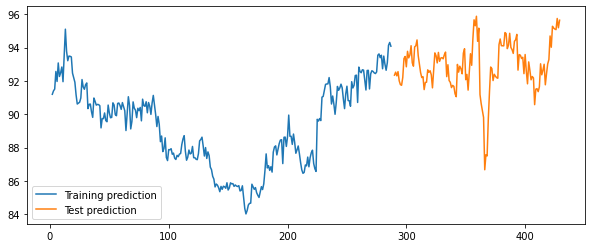

In [ ]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

def Prediction(model,X_train,X_test,y_train,y_test,scaler,look_back):
	# make predictions
	trainPredict = model.predict(X_train.reshape(X_train.shape[0],look_back))
	testPredict = model.predict(X_test.reshape(X_test.shape[0],look_back))
	# invert predictions
	trainPredict = scaler.inverse_transform(trainPredict)
	trainY = scaler.inverse_transform([y_train.flatten()])
	testPredict = scaler.inverse_transform(testPredict)
	testY = scaler.inverse_transform([y_test.flatten()])
	return trainPredict, testPredict

def Plot(dataset,trainPredict,testPredict,look_back):
	trainPredictPlot = np.empty_like(dataset)
	trainPredictPlot[:, :] = np.nan
	trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
	# shift test predictions for plotting
	testPredictPlot = np.empty_like(dataset+1)
	testPredictPlot[:, :] = np.nan
	Ntest = len(testPredict)
	NtestSpace = len(dataset)+1 - (len(trainPredict)+(look_back*2))
	restante = NtestSpace - Ntest
	print(restante)
	testPredictPlot[len(trainPredict)+(look_back*2):len(dataset)+1-restante, :] = testPredict
	
	# plot baseline and predictions
	plt.figure(figsize=(10,4))
	plt.plot(trainPredictPlot,label='Training prediction')
	plt.plot(testPredictPlot,label='Test prediction')
	plt.legend()
	plt.show()

model1.compile(optimizer='adam',loss='mse') # se define la función de perdida y el optimizer adam para actualizar los pesos
model1.fit(X_train.reshape(X_train.shape[0],look_back),y_train.flatten(),epochs=200, verbose=0) #entrenamiento de la red
trainPredict, testPredict = Prediction(model1,X_train,X_test,y_train,y_test,scaler,look_back)
Plot(df,trainPredict,testPredict,look_back)

*   Elemento de lista
*   Elemento de lista




In [ ]:
data_hour= data1.groupby([data1.departure.dt.to_period("h")] )

raw=pd.DataFrame(data_hour["cost_per_kg"].mean() )
raw.shape #número de datos 

(1408, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
raw = scaler.fit_transform(raw)

time_shift = 7 #shift es el número de pasos por delante que se esta prediciendo
n_rows = raw.shape[0] #n_rows es el número de pasos de tiempo de nuestra secuencia 
n_feats = raw.shape[1]
train_size = int(n_rows * 0.8)



#data de entrenamiento y test
train_data = raw[:train_size, :] #definiendo el set de entrenamiento
test_data = raw[train_size:, :] # 


x_train = train_data[:-time_shift, :] # 
x_test = test_data[:-time_shift,:] #
x_predict = raw[:-time_shift,:] #

Y_train = train_data[time_shift:, :] 
Y_test = test_data[time_shift:,:]
y_predict_true = raw[time_shift:,:]

x_train = x_train.reshape(1, x_train.shape[0], x_train.shape[1]) #
Y_train = Y_train.reshape(1, Y_train.shape[0], Y_train.shape[1])
x_test = x_test.reshape(1, x_test.shape[0], x_test.shape[1])
Y_test = Y_test.reshape(1, Y_test.shape[0], Y_test.shape[1])
x_predict = x_predict.reshape(1, x_predict.shape[0], x_predict.shape[1])
y_predict_true = y_predict_true.reshape(1, y_predict_true.shape[0], y_predict_true.shape[1])



In [ ]:
x_train.shape   

(1, 1119, 1)

In [ ]:
from keras.layers import Dropout
"""
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(None, x_train.shape[2])))
model.add(LSTM(32, return_sequences=True))
#model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
#model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
#model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
#model.add(Dropout(0.5))
model.add(LSTM(n_feats, return_sequences=True)) 

model.compile(loss='mse', optimizer='adam')#,metrics=['acc']) #optimizer='adam',metrics=['acc'])
"""
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(None, x_train.shape[2])))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(n_feats, return_sequences=True)) 

model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
history =model.fit(x_train, Y_train, epochs=100, batch_size=1, verbose=2, validation_data=(x_test,Y_test))  

Epoch 1/100
1/1 - 14s - loss: 0.1878 - val_loss: 0.2195 - 14s/epoch - 14s/step
Epoch 2/100
1/1 - 3s - loss: 0.1005 - val_loss: 0.1404 - 3s/epoch - 3s/step
Epoch 3/100
1/1 - 3s - loss: 0.0563 - val_loss: 0.0791 - 3s/epoch - 3s/step
Epoch 4/100
1/1 - 3s - loss: 0.0484 - val_loss: 0.0605 - 3s/epoch - 3s/step
Epoch 5/100
1/1 - 3s - loss: 0.0554 - val_loss: 0.0573 - 3s/epoch - 3s/step
Epoch 6/100
1/1 - 3s - loss: 0.0559 - val_loss: 0.0592 - 3s/epoch - 3s/step
Epoch 7/100
1/1 - 3s - loss: 0.0479 - val_loss: 0.0665 - 3s/epoch - 3s/step
Epoch 8/100
1/1 - 3s - loss: 0.0425 - val_loss: 0.0834 - 3s/epoch - 3s/step
Epoch 9/100
1/1 - 3s - loss: 0.0380 - val_loss: 0.1048 - 3s/epoch - 3s/step
Epoch 10/100
1/1 - 3s - loss: 0.0427 - val_loss: 0.1055 - 3s/epoch - 3s/step
Epoch 11/100
1/1 - 3s - loss: 0.0447 - val_loss: 0.0900 - 3s/epoch - 3s/step
Epoch 12/100
1/1 - 3s - loss: 0.0373 - val_loss: 0.0751 - 3s/epoch - 3s/step
Epoch 13/100
1/1 - 3s - loss: 0.0341 - val_loss: 0.0662 - 3s/epoch - 3s/step
Epoch

In [ ]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,val_loss
0,0.187786,0.219542
1,0.100541,0.140440
2,0.056317,0.079088
3,0.048433,0.060496
4,0.055417,0.057281


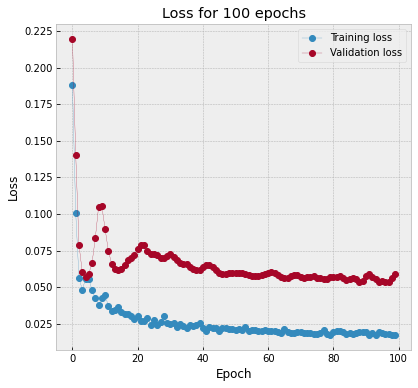

In [ ]:
fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()



y_predict_true:
(1, 1401, 1)
y_predict_model: 
(1, 1401, 1)
test length: 282


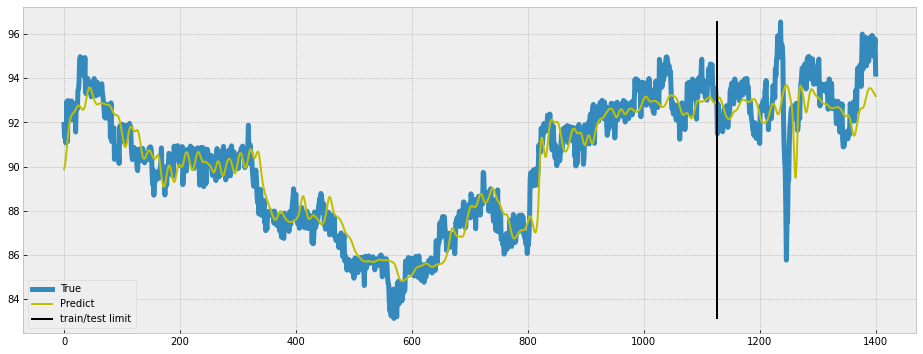

In [ ]:
y_predict_model = model.predict(x_predict)

print("\ny_predict_true:")
print (y_predict_true.shape)
print("y_predict_model: ")
print (y_predict_model.shape)


def plot(true, predicted, divider):

    predict_plot = scaler.inverse_transform(predicted[0])
    true_plot = scaler.inverse_transform(true[0])

    predict_plot = predict_plot[:,0]
    true_plot = true_plot[:,0]

    plt.figure(figsize=(16,6))
    plt.plot(true_plot, label='True',linewidth=5)
    plt.plot(predict_plot,  label='Predict',color='y')

    if divider > 0:
        maxVal = max(true_plot.max(),predict_plot.max())
        minVal = min(true_plot.min(),predict_plot.min())

        plt.plot([divider,divider],[minVal,maxVal],label='train/test limit',color='k')

    plt.legend()
    plt.show()

test_size = n_rows - train_size
print("test length: " + str(test_size))

plot(y_predict_true,y_predict_model,train_size)




*   Para el modelo de predicción de un paso se tomo un perceptrón multicapa ya que se tiene un problema de series de tiempo univariadas y de un solo paso y mlp resulta ser util.
Para el modelo de predicción multipaso se tomo una LSTM ya que estas están diseñadas para problemas de predicción de secuencia de objetos con dependencia estadística entre ellas.. Además la ventaja significativa de las redes neuronales es que son capaces de aprender y generalizar el conocimiento acumulado. 
*   Por la estructura de las redes neuronales recurrentes resulta buena idea hacer predicciones de series de tiempo.Y el perceptrón multicapa porque puede ser idoneo para problema de regresión.   
*  Se puede decir que los modelos diseñados son buenos respecto al "tradeoff" sesgo-varianza ya que las prediccion de los datos de entrenamiento son tan buenas como las de los datos de test.
* Haciendo cambio de los hiperparametros, aumentar el número de epocas, agregar una capa de dropout... en general realizar regularización.



0.10012492197250394

### Multistep